In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as snsS
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
dataset["Attrition_code"] = dataset["Attrition"].astype("category").cat.codes
dataset["BusinessTravel_code"] = dataset["BusinessTravel"].astype("category").cat.codes
dataset["gender_code"] = dataset["Gender"].astype("category").cat.codes
dataset["MaritalStatus_code"] = dataset["MaritalStatus"].astype("category").cat.codes
dataset["OverTime_code"] = dataset["OverTime"].astype("category").cat.codes
dataset["JobRole_code"] = dataset["JobRole"].astype("category").cat.codes
dataset["EducationField_code"] = dataset["EducationField"].astype("category").cat.codes
dataset["Department_code"] = dataset["Department"].astype("category").cat.codes
dataset["Attrition_pred_code"] = (dataset["Attrition"] == "Yes").astype("int")

In [5]:
df = dataset.drop(["OverTime","Attrition", "BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"], axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [7]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition_code,BusinessTravel_code,gender_code,MaritalStatus_code,OverTime_code,JobRole_code,EducationField_code,Department_code,Attrition_pred_code
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,0,2,1,7,1,2,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,0,6,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,2,1,2,4,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,0,1,1,6,1,1,0
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,1,0,2,3,1,0


In [8]:
x = df.drop(columns = ["Attrition_pred_code", "Attrition_code",])
y = df["Attrition_pred_code"]

In [9]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [10]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
classifier = svm.SVC()

In [12]:
hyperparameters = {'kernel': ['linear'],
                   'C': [0.01, 0.1],
                   'gamma': [0.01, 0.1]}

In [13]:
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

In [14]:
GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1], 'kernel': ['linear']})

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': [0.01, 0.1],
                         'kernel': ['linear']})

In [15]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(x_test_scaled)

SVC(C=0.1, gamma=0.01, kernel='linear') 



In [21]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))
print('AUC-ROC: {:.2f}'.format(auc_roc))

Accuracy: 0.82
Precision: 0.00
Recall: 0.00
F1-score: 0.00
AUC-ROC: 0.50


In [16]:
#Print the confusion matrix and performance metrics (classification report)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[241   0]
 [ 53   0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<Axes: >

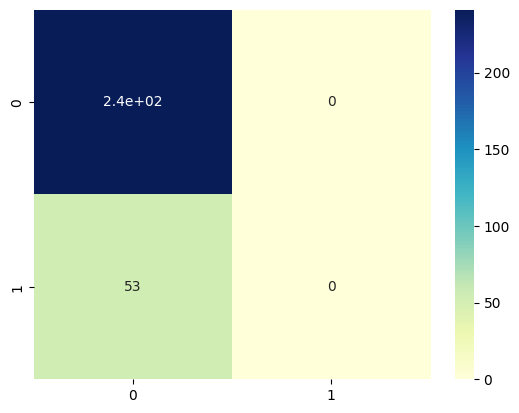

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

EmployeeCount               0.000000
StandardHours               0.000000
MonthlyIncome               0.005628
Education                   0.006256
MonthlyRate                 0.009890
TrainingTimesLastYear       0.012580
YearsAtCompany              0.013154
HourlyRate                  0.013286
EducationField_code         0.016853
BusinessTravel_code         0.024672
EmployeeNumber              0.032254
DailyRate                   0.039085
PercentSalaryHike           0.040851
StockOptionLevel            0.051334
JobRole_code                0.053831
WorkLifeBalance             0.057354
YearsWithCurrManager        0.062590
gender_code                 0.081051
PerformanceRating           0.090892
Age                         0.095590
RelationshipSatisfaction    0.117761
YearsSinceLastPromotion     0.120106
NumCompaniesWorked          0.120143
YearsInCurrentRole          0.123230
MaritalStatus_code          0.136978
DistanceFromHome            0.137068
JobInvolvement              0.138830
D

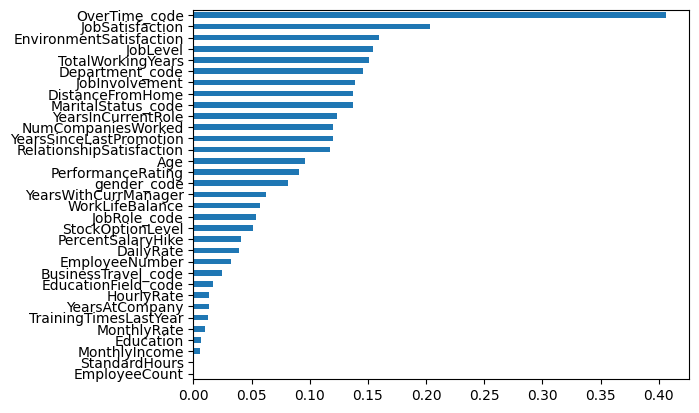

In [18]:
importances = pd.Series(best_classifier.coef_[0], index=x_train.columns)
importances_abs = abs(importances)
importances_abs_sorted = importances_abs.sort_values(ascending=True)
print(importances_abs_sorted, '\n')
importances_abs_sorted.plot(kind='barh')
plt.show()

In [19]:
# Print the coefficients of the hyperplane
coefficients = best_classifier.coef_
print(coefficients,'\n')
coefficients = abs(coefficients)
print(coefficients,'\n')

[[-0.09559022 -0.03908533  0.13706767  0.00625594  0.         -0.03225411
  -0.15945383 -0.01328595 -0.13883018 -0.1539722  -0.20291434 -0.00562799
  -0.00989033  0.12014252 -0.04085146  0.09089216 -0.11776125  0.
  -0.05133355 -0.1504662  -0.01258032 -0.05735367  0.01315438 -0.12322978
   0.12010596 -0.06259025 -0.02467154  0.08105113  0.13697795  0.40608308
  -0.05383139 -0.0168534   0.14532384]] 

[[0.09559022 0.03908533 0.13706767 0.00625594 0.         0.03225411
  0.15945383 0.01328595 0.13883018 0.1539722  0.20291434 0.00562799
  0.00989033 0.12014252 0.04085146 0.09089216 0.11776125 0.
  0.05133355 0.1504662  0.01258032 0.05735367 0.01315438 0.12322978
  0.12010596 0.06259025 0.02467154 0.08105113 0.13697795 0.40608308
  0.05383139 0.0168534  0.14532384]] 



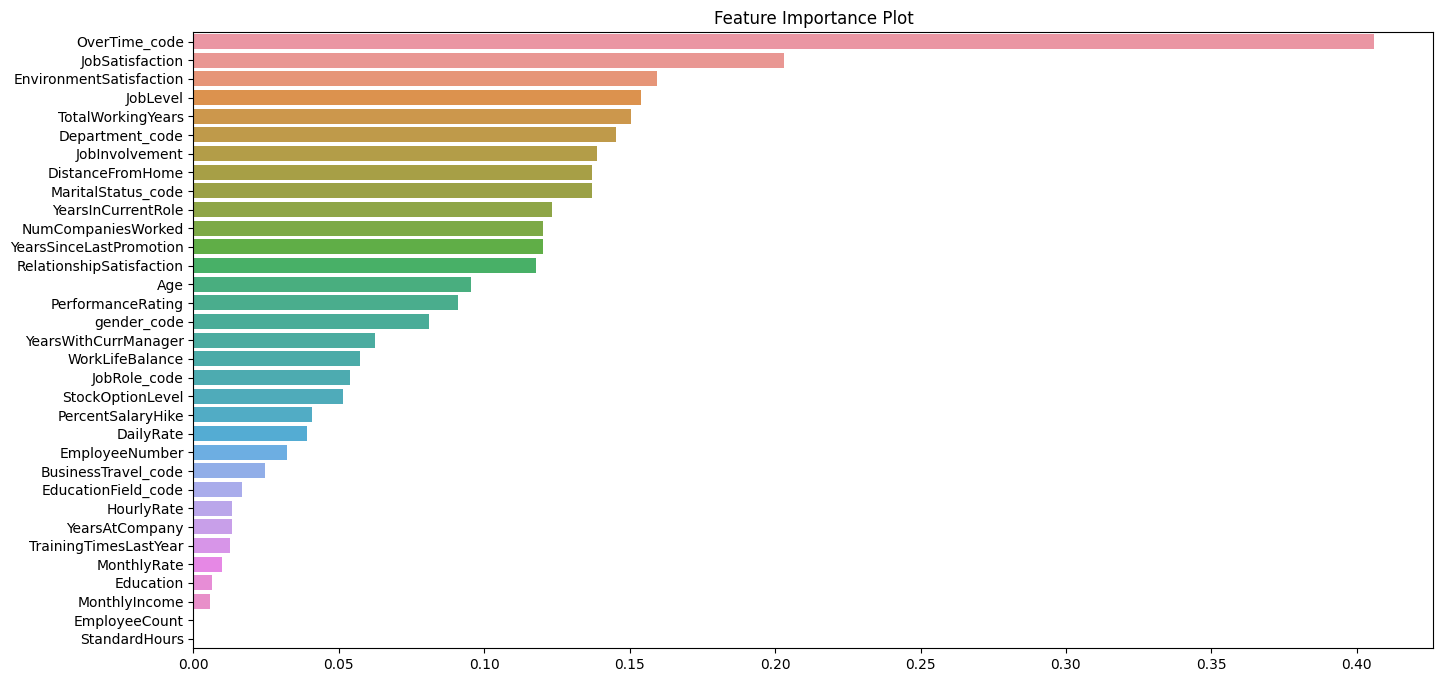

In [20]:
# Display the coefficients
#import matplotlib.pyplot as plt
#%matplotlib inline
fig, ax = plt.subplots(figsize=(16, 8))
coefficients = best_classifier.coef_
coefficients_abs = abs(coefficients)
coefficients_sorted = pd.Series(coefficients_abs[0], index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=coefficients_sorted, y=coefficients_sorted.index, order=coefficients_sorted.sort_values(ascending=False).index)
ax.set_title("Feature Importance Plot")
plt.show()